## Imports

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
from sklearn.cluster import KMeans

## Custom K-means Algorithm

In [8]:
class Custom_KMeans:
    def __init__(self, k=5, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        self.centroids = None
        self.labels = None

    def fit(self, data):
        self.centroids = self.random_centroids(data)
        self.labels = self.get_labels(data, self.centroids)
        old_centroids = pd.DataFrame()
        iteration = 1

        while iteration <= self.max_iterations and not self.centroids.equals(old_centroids):
            old_centroids = self.centroids
            self.labels = self.get_labels(data, self.centroids)
            self.centroids = self.new_centroids(data, self.labels)
            self.plot_clusters(data, iteration)  # Plot clusters in each iteration
            iteration += 1

    def predict(self, data):
        return self.get_labels(data, self.centroids)

    def random_centroids(self, data):
        centroids = []
        for i in range(self.k):
            random.seed(42)
            centroid = data.apply(lambda x: float(x.sample().iloc[0]))
            centroids.append(centroid)
        return pd.concat(centroids, axis=1)

    def get_labels(self, data, centroids):
        distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
        return distances.idxmin(axis=1)

    def new_centroids(self, data, labels):
        return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

    def plot_clusters(self, data, iteration):
        pca = PCA(n_components=2)
        data_2d = pca.fit_transform(data)
        centroids_2d = pca.transform(self.centroids.T)
        clear_output(wait=True)
        plt.title(f'Iteration {iteration}')
        plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=self.labels)
        plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
        plt.show()

## Load the dataset and do scaling

In [ ]:
# Dataset
players = pd.read_csv("/Users/dplavos/Desktop/MachineLearning/ML_PROJECT/archive/players_22.csv")
features = ["overall", "potential", "wage_eur", "value_eur", "age"]
players = players.dropna(subset=features)
data = players[features].copy()

# Min-max scaling # data in the range [0-10]
data = (data - data.min()) / (data.max() - data.min()) * 9 + 1

## Fit and Predict using Custom K-means Algorithn

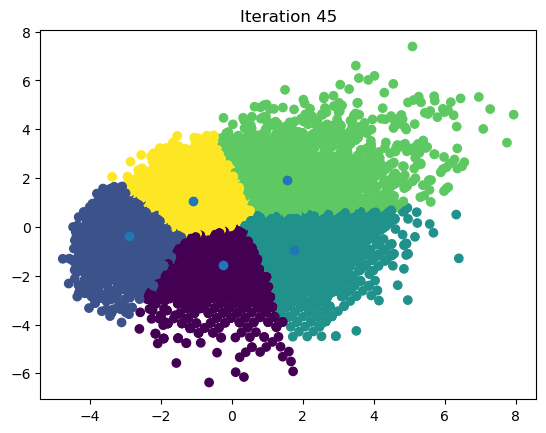

,0,1,2,3,4
overall,4.076277,2.516946,5.466107,6.512569,4.318374
potential,3.990572,4.422514,5.121336,6.888703,5.870807
wage_eur,1.046214,1.016169,1.208573,1.713725,1.073262
value_eur,1.026673,1.013486,1.073411,1.485764,1.062302
age,4.713518,2.311268,5.886358,3.930392,2.685356


In [15]:
# Create KMeans object
kmeans = Custom_KMeans(k=5, max_iterations=100)

# Fit the data
kmeans.fit(data)

# Get labels for prediction
labels = kmeans.predict(data)

# Access centroids
centroids = kmeans.centroids
centroids

## Run K-means from Scikit-Learn

In [14]:
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(data)
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2,3,4
overall,7.109897,4.192759,5.629268,2.992981,4.957030
potential,7.285131,4.060170,5.268377,4.876076,6.120792
wage_eur,2.291925,1.050130,1.260050,1.021618,1.153628
value_eur,1.916274,1.027317,1.083618,1.019558,1.098317
age,4.384899,4.934324,6.064790,2.427492,3.132459
